# Análise de Desempenho da Alura Store

Este projeto tem como objetivo ajudar a direção da Alura Store na tomada de decisão sobre qual das quatro lojas da rede deve ser vendida. Para isso, analisamos dados reais de vendas, avaliações e desempenho logístico das lojas entre os anos de 2020 e 2022.

A seguir, apresentamos as etapas do projeto:
- Importação e limpeza dos dados
- Cálculo de métricas de desempenho
- Visualizações comparativas
- Recomendação final baseada nos dados

In [1]:
cores = {
    'loja 1': '#1F77B4', #azul
    'loja 2': '#FF7F0E', #laranja
    'loja 3': '#2CA02C', #verde
    'loja 4': '#D62728', #vermelho
    'titulos': '#05001E', #roxo escuro
    'apoio': '#647D8F', #cinza azulado
    'background':'A4CDEB' #azul bebe
}

## Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

In [4]:
df_geral = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df_geral.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [5]:
df_geral["Loja"].value_counts()

,count
Loja,
Loja 1,2359
Loja 2,2359
Loja 3,2359
Loja 4,2358


In [6]:
df_geral.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000


In [7]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [8]:
df_geral.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [9]:
# Para remover todos os espaços e deixar o nome das colunas em letras minusculas
df_geral.columns = df_geral.columns.str.lower().str.replace(' ', '_')
df_geral['categoria_do_produto'] = df_geral['categoria_do_produto'].str.lower().str.strip()
df_geral['loja'] = df_geral['loja'].str.lower().str.strip()
df_geral.head()

,produto,categoria_do_produto,preço,frete,data_da_compra,vendedor,local_da_compra,avaliação_da_compra,tipo_de_pagamento,quantidade_de_parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja 1


In [10]:
# transformar a data da compra no tipo data
df_geral['data_da_compra'] = pd.to_datetime(df_geral['data_da_compra'], dayfirst=True)
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   produto                 9435 non-null   object        
 1   categoria_do_produto    9435 non-null   object        
 2   preço                   9435 non-null   float64       
 3   frete                   9435 non-null   float64       
 4   data_da_compra          9435 non-null   datetime64[ns]
 5   vendedor                9435 non-null   object        
 6   local_da_compra         9435 non-null   object        
 7   avaliação_da_compra     9435 non-null   int64         
 8   tipo_de_pagamento       9435 non-null   object        
 9   quantidade_de_parcelas  9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  loja                    9435 non-null   object  

In [11]:
df_geral = df_geral.drop(columns=['lat','lon'])

In [12]:
df_geral['total_venda'] = df_geral['preço'] + df_geral['frete']
df_geral['ano'] = df_geral['data_da_compra'].dt.year
df_geral['mes'] = df_geral['data_da_compra'].dt.month
df_geral.head()

,produto,categoria_do_produto,preço,frete,data_da_compra,vendedor,local_da_compra,avaliação_da_compra,tipo_de_pagamento,quantidade_de_parcelas,loja,total_venda,ano,mes
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,loja 1,228.329790,2021,1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,loja 1,267.584305,2022,5
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,loja 1,300.772681,2021,3
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,loja 1,1064.657344,2022,5
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,loja 1,473.954689,2020,11


In [13]:
def formatar_valor(valor):
    return f'R$ {valor/1_000_000:.3f} mi'

## Cálculo de métricas de desempenho

### 1. Análise do faturamento


In [14]:
faturamento_por_loja = df_geral.groupby('loja')['total_venda'].sum().sort_values(ascending=False)
print(faturamento_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace('.', ',').replace(',', '.', 1)))

loja
loja 1    R$ 1.616,347,09
loja 2    R$ 1.567,773,22
loja 3    R$ 1.542,047,69
loja 4    R$ 1.458,253,46
Name: total_venda, dtype: object


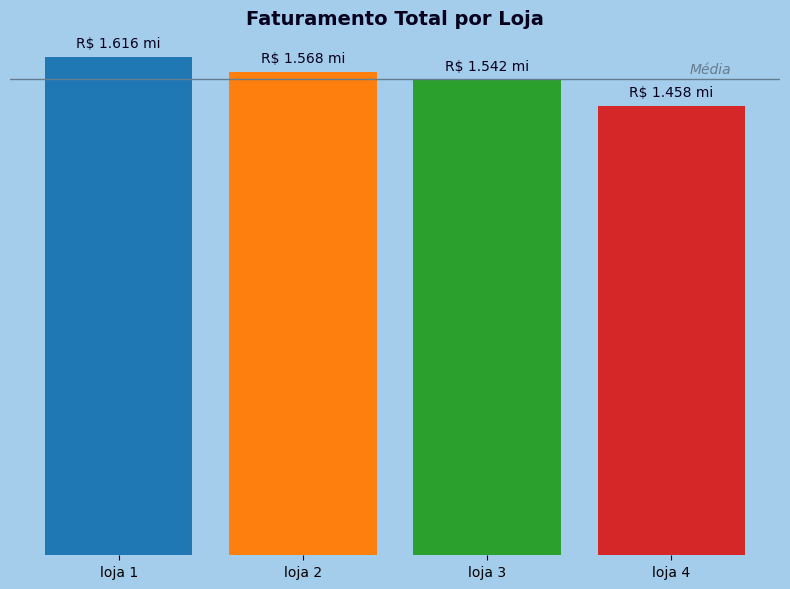

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

bars = ax.bar(faturamento_por_loja.index, faturamento_por_loja.values,
              color=[cores[loja] for loja in faturamento_por_loja.index])

ax.set_title('Faturamento Total por Loja', fontsize=14, fontweight='bold',color=cores['titulos'])
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.yaxis.set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(formatar_valor(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, color=cores['titulos'])


media = faturamento_por_loja.mean()
ax.axhline(media, color=cores['apoio'], linestyle='-', linewidth=1)
ax.text(3.1, media + 20000, 'Média',
        color=cores['apoio'], fontsize=10, fontstyle='italic')

fig.patch.set_facecolor(f'#{cores["background"]}')

plt.grid(False)
plt.box(False)
plt.tight_layout()
plt.show()

### 2. Vendas por Categoria


In [16]:
categorias_geral = df_geral['categoria_do_produto'].value_counts().sort_values()
print(categorias_geral)

categoria_do_produto
utilidades domesticas     730
livros                    742
instrumentos musicais     753
esporte e lazer          1113
eletrodomesticos         1149
brinquedos               1290
eletronicos              1772
moveis                   1886
Name: count, dtype: int64


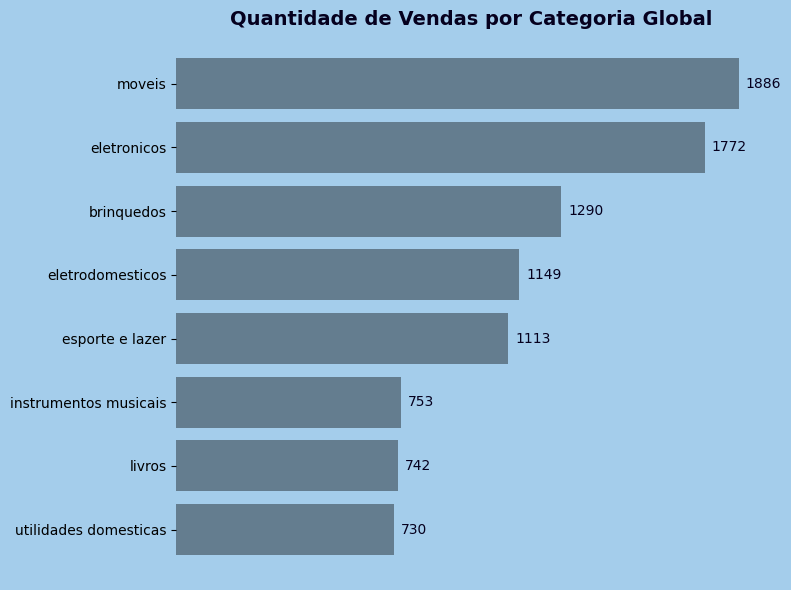

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(categorias_geral.index, categorias_geral.values, color=cores['apoio'], edgecolor='none')

ax.set_title('Quantidade de Vendas por Categoria Global', fontsize=14, color=cores['titulos'], fontweight='bold')
ax.xaxis.set_visible(False)


for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10, color=cores['titulos'])

fig.patch.set_facecolor(f'#{cores["background"]}')
plt.grid(False)
plt.box(False)
plt.tight_layout()
plt.show()

In [18]:
faturamento_por_categoria = df_geral.groupby('categoria_do_produto')['total_venda'].sum().sort_values()
print(faturamento_por_categoria.apply(lambda x: f"R$ {x:,.2f}".replace('.', ',').replace(',', '.', 1)))

categoria_do_produto
livros                      R$ 53.007,43
utilidades domesticas       R$ 80.921,72
brinquedos                 R$ 103.502,36
esporte e lazer            R$ 200.891,94
instrumentos musicais      R$ 489.701,48
moveis                   R$ 1.064,149,77
eletrodomesticos         R$ 1.860,198,66
eletronicos              R$ 2.332,048,08
Name: total_venda, dtype: object


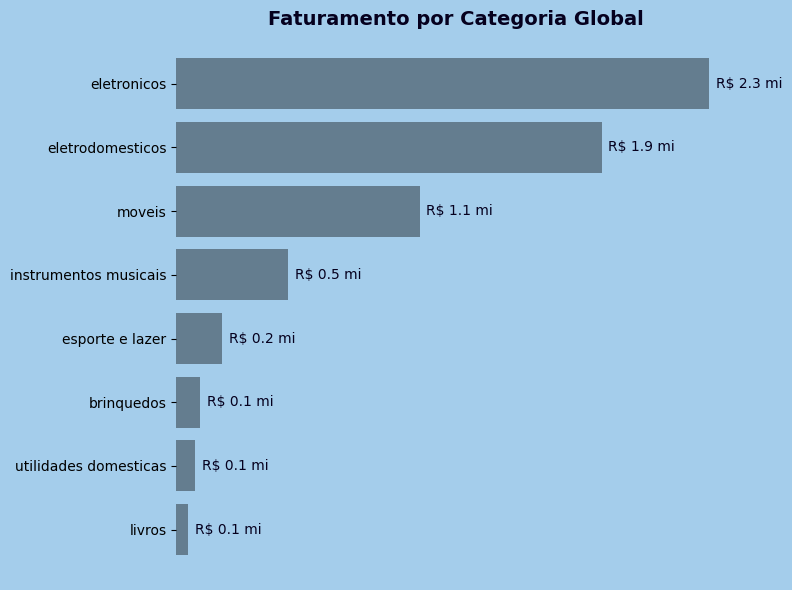

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(faturamento_por_categoria.index, faturamento_por_categoria.values,color=cores['apoio'], edgecolor='none')

ax.set_title('Faturamento por Categoria Global', fontsize=14, color=cores['titulos'], fontweight='bold')
ax.set_xlabel('Faturamento (R$)', fontsize=12)
ax.xaxis.set_visible(False)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'R$ {width / 1_000_000:.1f} mi',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10, color=cores['titulos'])

fig.patch.set_facecolor(f'#{cores["background"]}')
plt.grid(False)
plt.box(False)
plt.tight_layout()
plt.show()

### 3. Média de Avaliação das Lojas

In [20]:
avaliacao_media = df_geral.groupby('loja')['avaliação_da_compra'].mean().sort_values(ascending=False)
print(avaliacao_media)

loja
loja 3    4.048326
loja 2    4.037304
loja 4    3.995759
loja 1    3.976685
Name: avaliação_da_compra, dtype: float64


In [21]:
distribuicao_avaliacoes = df_geral.groupby(['loja', 'avaliação_da_compra']).size().unstack().fillna(0)
distribuicao_avaliacoes

avaliação_da_compra,1,2,3,4,5
loja,,,,,
loja 1,319,86,218,444,1292
loja 2,273,93,209,482,1302
loja 3,297,79,193,434,1356
loja 4,310,85,210,453,1300


#### Considerações sobre a variável de avaliação

Embora a variável `avaliação_da_compra` tenha sido incluída na análise, observa-se que sua distribuição é muito uniforme entre as lojas, com média próxima de 4,0 e com a maioria das notas concentradas em avaliações 5.

Tentativas de análise por distribuição absoluta e percentual não revelaram diferenças significativas entre as unidades. Por esse motivo, esta métrica não foi considerada determinante na recomendação final.


### 4. Produtos Mais e Menos Vendidos

In [22]:
vendas_por_produto = df_geral['produto'].value_counts()

top_10 = vendas_por_produto.head(10)
bottom_10 = vendas_por_produto.tail(10)

print("Produtos Mais Vendidos:")
print(top_10)

print("\nProdutos Menos Vendidos:")
print(bottom_10)

Produtos Mais Vendidos:
produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

Produtos Menos Vendidos:
produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [23]:
vendas_loja_categoria = df_geral.groupby(['loja', 'categoria_do_produto']).agg({
    'total_venda': 'sum',
    'categoria_do_produto': 'count'  # conta o número de vendas por categoria
}).rename(columns={'categoria_do_produto': 'quantidade'}).reset_index()


top_categorias_por_loja = vendas_loja_categoria.sort_values(
    ['loja', 'quantidade', 'total_venda'],
    ascending=[True, False, False]
).groupby('loja').head(5)

top_categorias_por_loja

,loja,categoria_do_produto,total_venda,quantidade
6,loja 1,moveis,263505.317336,465
2,loja 1,eletronicos,603278.238660,448
0,loja 1,brinquedos,25299.265959,324
1,loja 1,eletrodomesticos,510678.320571,312
3,loja 1,esporte e lazer,55216.657567,284
14,loja 2,moveis,247817.049515,442
10,loja 2,eletronicos,576858.274761,422
8,loja 2,brinquedos,22445.828832,313
9,loja 2,eletrodomesticos,489499.129045,305
11,loja 2,esporte e lazer,48828.896941,275


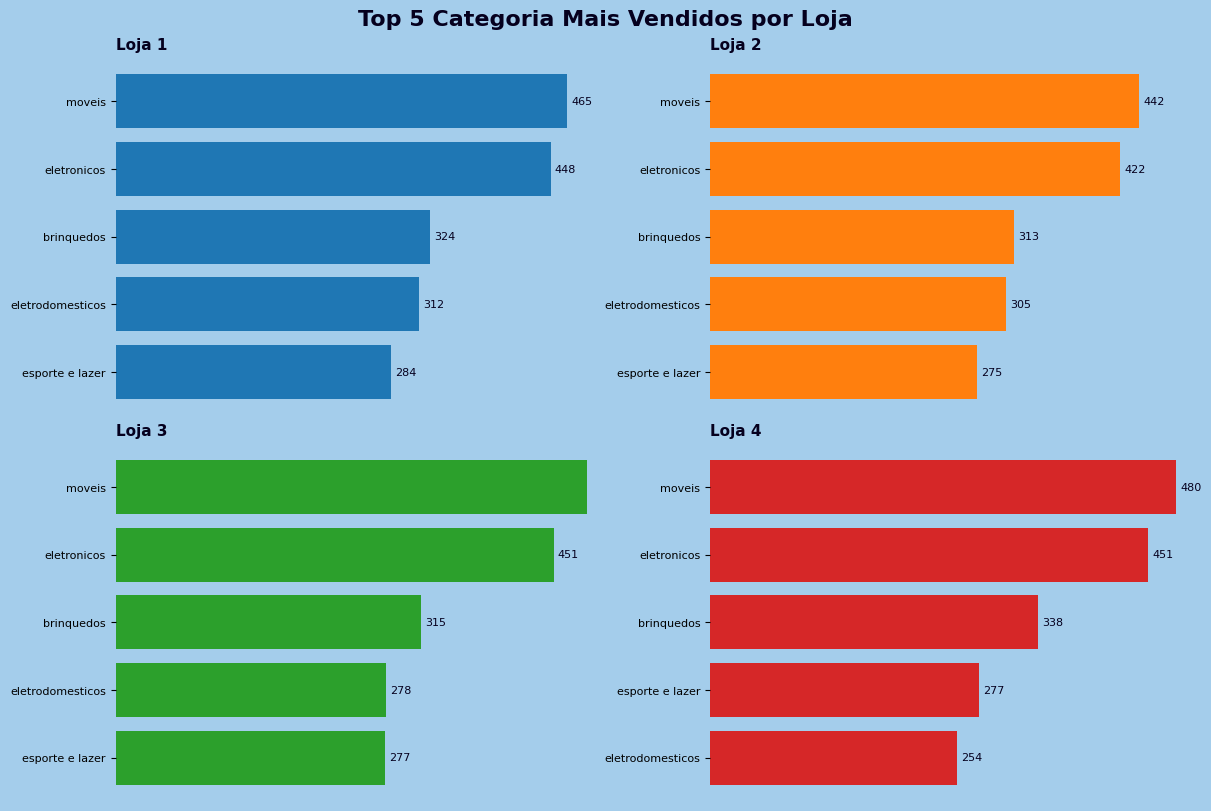

In [30]:
lojas = sorted(top_categorias_por_loja['loja'].unique())

fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True, sharex=True)
fig.suptitle('Top 5 Categoria Mais Vendidos por Loja', fontsize=16, color=cores['titulos'], fontweight='bold', fontfamily='sans-serif')

eixos = axs.flatten()

for i, loja in enumerate(lojas):
    loja_lower = loja.lower()
    ax = eixos[i]

    dados_loja = top_categorias_por_loja[top_categorias_por_loja['loja'] == loja]
    dados_loja = dados_loja.sort_values(by='quantidade')

    bars = ax.barh(dados_loja['categoria_do_produto'], dados_loja['quantidade'], color=cores[loja_lower], edgecolor='none')

    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords='offset points',
                    ha='left', va='center',
                    fontsize=8, color=cores['titulos'])

        for spine in ax.spines.values():
          spine.set_visible(False)

    ax.set_title(loja.title(), fontsize=11, fontweight='bold', loc='left', color=cores['titulos'])


    ax.xaxis.set_visible(False)
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(False)
    #ax.box(False)
    ax.set_facecolor('none')
    ax.set_xlim(0, dados_loja['quantidade'].max() + 5)


fig.patch.set_facecolor(f'#{cores["background"]}')
plt.grid(False)
plt.show()


### 5. Frete Médio por Loja


In [25]:
frete_medio = df_geral.groupby('loja')['frete'].mean().sort_values()
print(frete_medio.apply(lambda x: f"R$ {x:,.2f}".replace('.', ',').replace(',', '.', 1)))

loja
loja 4    R$ 31.28
loja 3    R$ 33.07
loja 2    R$ 33.62
loja 1    R$ 34.69
Name: frete, dtype: object


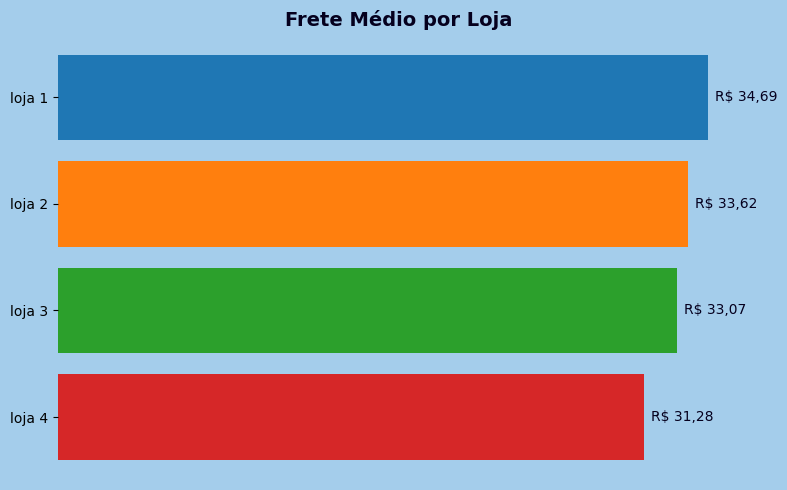

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(frete_medio.index, frete_medio.values,
               color=[cores[loja] for loja in frete_medio.index],
               edgecolor='none')

# Título e estilo
ax.set_title('Frete Médio por Loja', fontsize=14, color=cores['titulos'], fontweight='bold')
ax.set_xlabel('Valor médio do frete (R$)', fontsize=12)
ax.xaxis.set_visible(False)

# Anotar valores formatados
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'R$ {width:.2f}'.replace('.', ','),  # formato brasileiro
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10, color=cores['titulos'])

fig.patch.set_facecolor(f'#{cores["background"]}')
plt.grid(False)
plt.box(False)
plt.tight_layout()
plt.show()

## Relatório

Analisamos as quatro lojas da Alura Store, com foco no faturamento, a variedade de produtos, o custo médio do frete e o comportamento das vendas por categoria, conseguimos ter uma visão clara para ajudar na tomada de decisão

### Principais Insights:

- **Faturamento Total**: As lojas apresentam faturamentos semelhantes, mas a **Loja 4 foi a que obteve o menor faturamento**, ficando abaixo da média da rede.

- **Vendas por Categoria**: A rede concentra a maior parte da quantidade de vendas em **móveis e eletrônicos**. No entanto, as categorias que mais geram faturamento são **eletrônicos e eletrodomésticos**. A **Loja 4**, por sua vez, tem ênfase nas vendas de móveis, com **mais de 18% do seu faturamento** concentrado nessa categoria. Já a **Loja 1**, que apresentou maior eficiência em faturamento geral, tem apenas **16% de sua receita** vinculada aos móveis.

- **Frete Médio**: O frete médio das lojas gira em torno de 33,16. A Loja 4 se destaca positivamente, apresentando um frete médio **R$ 1,53 mais barato** do que a média das demais — um possível diferencial logístico e competitivo.

- **Produtos mais vendidos por loja**: Nenhuma loja se destaca por vender produtos com maior faturamento agregado. No entanto, chama atenção que a **Loja 4 apresenta o pior desempenho em vendas de eletrodomésticos**, a **segunda categoria mais rentável da rede**.

---
<br>
<br>

### Conclusão:

Com base nos dados analisados, **a recomendação é vender a Loja 4**.

Apesar de apresentar um diferencial logistico com frete abaixo da média, a Loja 4 apresenta o **pior desempenho combinado** entre faturamento, logística e portfólio de vendas. Essa decisão pode liberar recursos para expansão de unidades mais eficientes ou viabilizar um novo empreendimento mais alinhado com o perfil de consumo da rede.
<br>
<br>

---
